# Lecture 4

notes for the code: the file <font face="Courier">input.(state)</font> contains, in order:
- a <font face="Courier">double</font>, the starting temperature;
- an <font face="Courier">int</font>, the number of particles;
- three <font face="Courier">double</font>, respectively density particle, cutoff radius and time-step of integration;
- three <font face="Courier">int</font>, the number of steps for each block, the number of blocks and the steps for the equilibration;
- an <font face="Courier">int</font>, for the old configuration (if set =1, the program will read the old configuration, else will generate a random initial configuration);
- two <font face="Courier">int</font>, which controls the printing of instant measurements and progressive particle configurations (if set to 1 they will print, else not).

Choose the phase you want to simulate (input.solid, .liquid or .gas) and run <font face="Courier">esercizio4 input.(phase)</font>, then move all the output files (<font face="Courier">output.(quantity).0</font>). The program measures the quantities of interest (Potential and Kinetic Energies per article, Temperature and Preassure) every 10 steps, both in the equilibration and in the simulation, and works with reduced units. It will also calculate the radial distribution function $g(r)$, used in the Lecture 7

## Exercise 4

We want to simulate the behaviour of all the three phases of Argon, using a Molecular Dynamics (MD) code in a Lennard-Jones Model. In all the three following sections we have a plot of Temperature-vs-steps during the equilibration, then four plot showing Energy per particle-vs-steps (respectively all the three, Potential, Kinetic and Total) and fianlly Temperature-vs-steps and Pressure-vs-step.

The Lennard-Jones potenital is
$$V(r)=4\epsilon \left[ \left(\dfrac{\sigma}{r}\right)^{12} - \left(\dfrac{\sigma}{r}\right)^{6} \right]$$
with $\sigma=0,34nm$ and $\epsilon=1.6568 \times 10^{-21}J=0,0103eV$ for Argon ($m_{at}=39.948a.m.u.$).
The reduced units are:
- lenght: $r^*=r/\sigma$
- particle density: $\rho^*=\rho\sigma^3$
- temperature: $T^*=Tk_B/\epsilon$
- energy: $E^*=E/\epsilon$
- pressure: $P^*=P\sigma^3/\epsilon$
- mass: $m^*=m/m_{at}$
- time: $t^*=t*\sigma\sqrt{m_{at}/\epsilon}$

### solid

in reduced units: $\rho^*=1.1$, $T^*=0.8$ (cut-off radius: $r_c=2.2$)

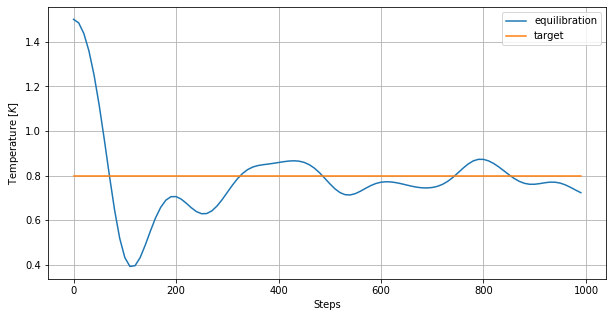

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

kB=1.38065e-23
E=1.6568e-21
EeV=0.0103
sigma=0.34e-9
P=E/sigma**3
T=120

tempeq=np.loadtxt("es4/Solid/temp_eq.0", usecols=(0), unpack='true')
xeq=np.zeros(len(tempeq))
target=np.zeros(len(tempeq))
for i in range(len(tempeq)):
    xeq[i]=10*i
target.fill(0.8)
plt.figure(0,figsize=(10,5))
plt.plot(xeq,tempeq, label="equilibration")
plt.plot(xeq,target, label="target")
plt.xlabel('Steps')
plt.ylabel('Temperature $[K]$')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

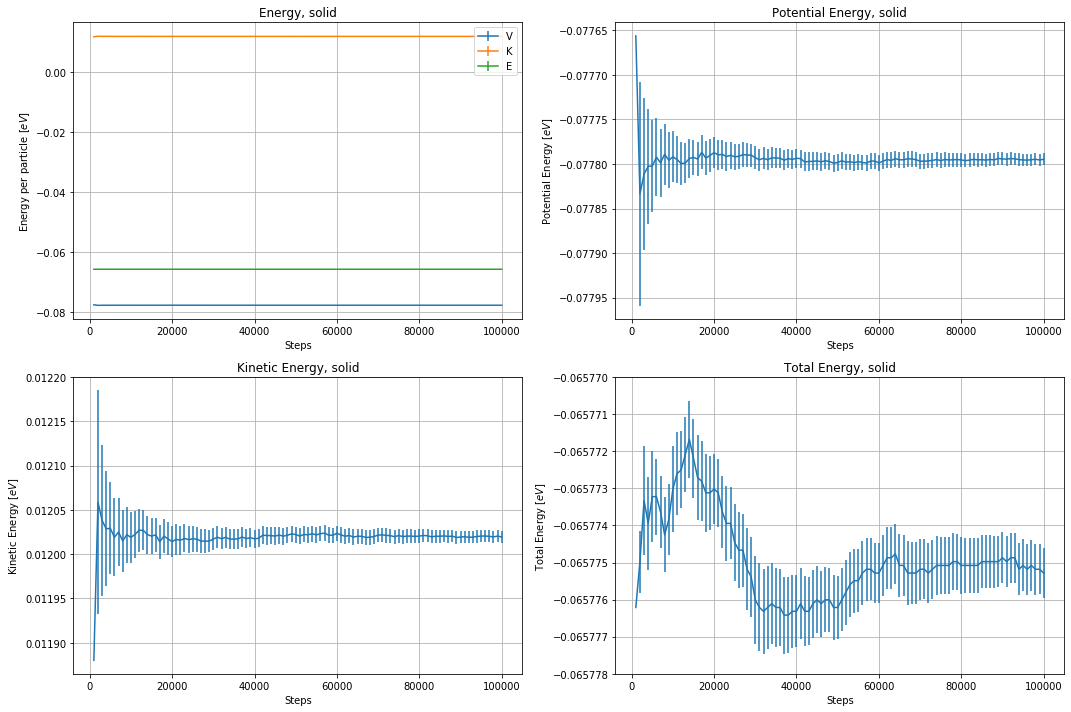

In [24]:
x,epot,err_pot=np.loadtxt("es4/Solid/output.epot.0", usecols=(0,2,3), unpack='true')
ekin,err_kin=np.loadtxt("es4/Solid/output.ekin.0", usecols=(2,3), unpack='true')
etot,err_tot=np.loadtxt("es4/Solid/output.etot.0", usecols=(2,3), unpack='true')
plt.figure(0,figsize=(15,10))

plt.subplot(221)
plt.errorbar(1000*x,EeV*epot,yerr=EeV*err_pot,label='V')
plt.errorbar(1000*x,EeV*ekin,yerr=EeV*err_kin,label='K')
plt.errorbar(1000*x,EeV*etot,yerr=EeV*err_tot,label='E')
plt.title("Energy, solid")
plt.xlabel('Steps')
plt.ylabel('Energy per particle $[eV]$')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(222)
plt.errorbar(1000*x,EeV*epot,yerr=EeV*err_pot,label='V')
plt.title("Potential Energy, solid")
plt.xlabel('Steps')
plt.ylabel('Potential Energy $[eV]$')
plt.grid(True)

plt.subplot(223)
plt.errorbar(1000*x,EeV*ekin,yerr=EeV*err_kin,label='K')
plt.title("Kinetic Energy, solid")
plt.xlabel('Steps')
plt.ylabel('Kinetic Energy $[eV]$')
plt.grid(True)

plt.subplot(224)
plt.errorbar(1000*x,EeV*etot,yerr=EeV*err_tot,label='E')
plt.title("Total Energy, solid")
plt.xlabel('Steps')
plt.ylabel('Total Energy $[eV]$')
plt.ylim(-6.5778e-2,-6.577e-2)
plt.grid(True)

plt.tight_layout()
plt.show()

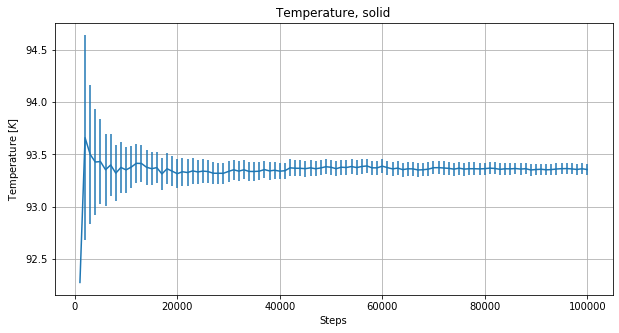

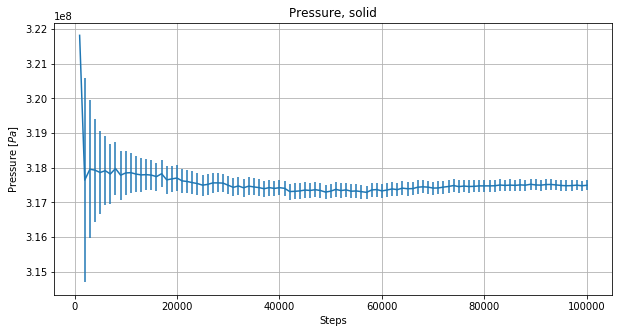

In [25]:
plt.figure(0,figsize=(10,5))
temp,err_temp=np.loadtxt("es4/Solid/output.temp.0", usecols=(2,3), unpack='true')
plt.errorbar(1000*x,T*temp,yerr=T*err_temp,label='T')
plt.title("Temperature, solid")
plt.xlabel('Steps')
plt.ylabel('Temperature $[K]$' )
plt.grid(True)
plt.show()


plt.figure(0,figsize=(10,5))
pres,err_pres=np.loadtxt("es4/Solid/output.pres.0", usecols=(2,3), unpack='true')
plt.errorbar(1000*x,P*pres,yerr=P*err_pres,label='P')
plt.title("Pressure, solid")
plt.xlabel('Steps')
plt.ylabel('Pressure $[Pa]$')
plt.grid(True)
plt.show()

### liquid

in reduced units: $\rho^*= 0.8$, $T^*=1.1$ (cut-off radius: $r_c=2.5$)

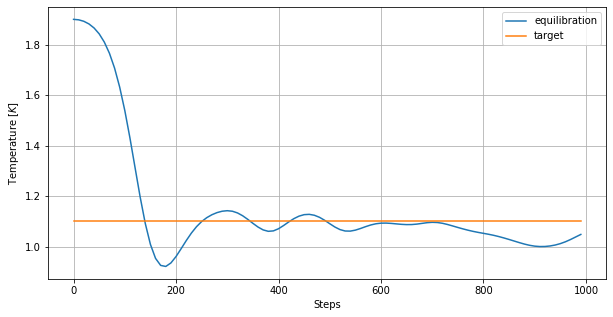

In [26]:
tempeq=np.loadtxt("es4/Liquid/temp_eq.0", usecols=(0), unpack='true')
xeq=np.zeros(len(tempeq))
target=np.zeros(len(tempeq))
for i in range(len(tempeq)):
    xeq[i]=10*i
target.fill(1.1)
plt.figure(0,figsize=(10,5))
plt.plot(xeq,tempeq, label="equilibration")
plt.plot(xeq,target, label="target")
plt.xlabel('Steps')
plt.ylabel('Temperature $[K]$')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

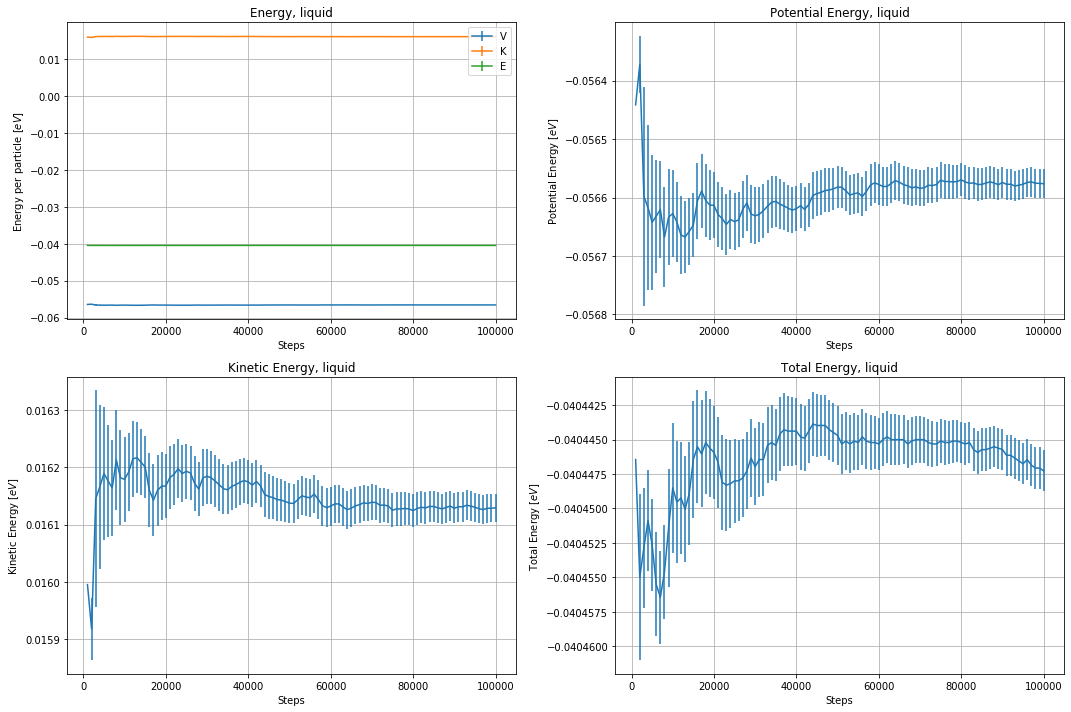

In [27]:
x,epot,err_pot=np.loadtxt("es4/Liquid/output.epot.0", usecols=(0,2,3), unpack='true')
ekin,err_kin=np.loadtxt("es4/Liquid/output.ekin.0", usecols=(2,3), unpack='true')
etot,err_tot=np.loadtxt("es4/Liquid/output.etot.0", usecols=(2,3), unpack='true')
plt.figure(0,figsize=(15,10))

plt.subplot(221)
plt.errorbar(1000*x,EeV*epot,yerr=EeV*err_pot,label='V')
plt.errorbar(1000*x,EeV*ekin,yerr=EeV*err_kin,label='K')
plt.errorbar(1000*x,EeV*etot,yerr=EeV*err_tot,label='E')
plt.title("Energy, liquid")
plt.xlabel('Steps')
plt.ylabel('Energy per particle $[eV]$')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(222)
plt.errorbar(1000*x,EeV*epot,yerr=EeV*err_pot,label='V')
plt.title("Potential Energy, liquid")
plt.xlabel('Steps')
plt.ylabel('Potential Energy $[eV]$')
plt.grid(True)

plt.subplot(223)
plt.errorbar(1000*x,EeV*ekin,yerr=EeV*err_kin,label='K')
plt.title("Kinetic Energy, liquid")
plt.xlabel('Steps')
plt.ylabel('Kinetic Energy $[eV]$')
plt.grid(True)

plt.subplot(224)
plt.errorbar(1000*x,EeV*etot,yerr=EeV*err_tot,label='E')
plt.title("Total Energy, liquid")
plt.xlabel('Steps')
plt.ylabel('Total Energy $[eV]$')
plt.grid(True)

plt.tight_layout()
plt.show()

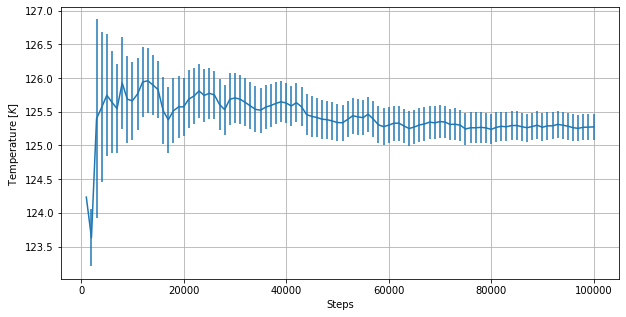

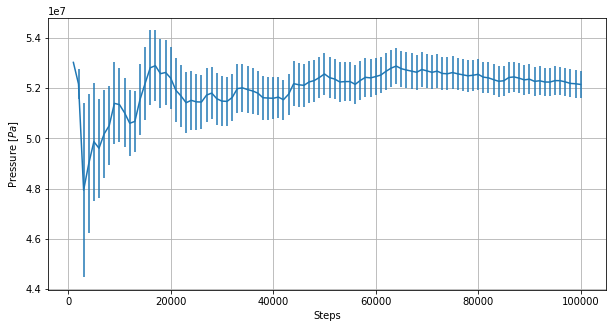

In [28]:
plt.figure(0,figsize=(10,5))
temp,err_temp=np.loadtxt("es4/Liquid/output.temp.0", usecols=(2,3), unpack='true')
plt.errorbar(1000*x,T*temp,yerr=T*err_temp,label='T')
plt.xlabel('Steps')
plt.ylabel('Temperature $[K]$')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,5))
pres,err_pres=np.loadtxt("es4/Liquid/output.pres.0", usecols=(2,3), unpack='true')
plt.errorbar(1000*x,P*pres,yerr=P*err_pres,label='P')
plt.xlabel('Steps')
plt.ylabel('Pressure $[Pa]$')
plt.grid(True)
plt.show()

### gas

in reduced units: $\rho^*= 0.05$, $T^*=1.2$ (cut-off radius: $r_c=5.0$)

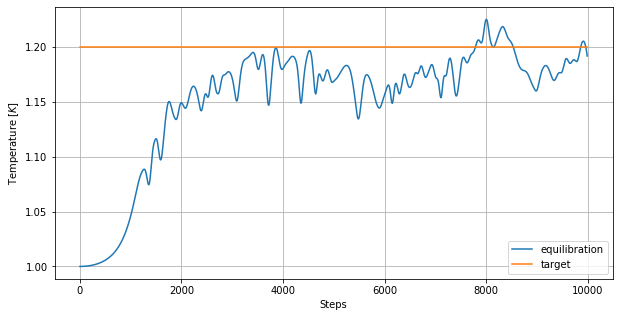

In [41]:
tempeq=np.loadtxt("es4/Gas/temp_eq.0", usecols=(0), unpack='true')
xeq=np.zeros(len(tempeq))
target=np.zeros(len(tempeq))
for i in range(len(tempeq)):
    xeq[i]=10*i
target.fill(1.2)
plt.figure(0,figsize=(10,5))
plt.plot(xeq,tempeq, label="equilibration")
plt.plot(xeq,target, label="target")
plt.xlabel('Steps')
plt.ylabel('Temperature $[K]$')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

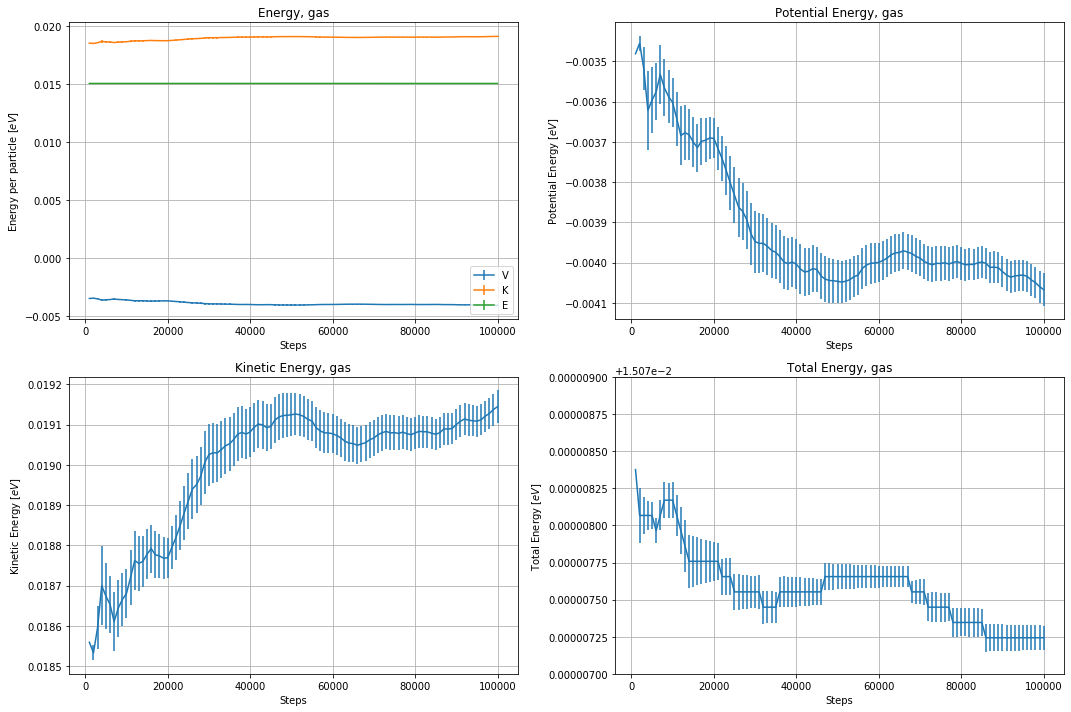

In [42]:
x,epot,err_pot=np.loadtxt("es4/Gas/output.epot.0", usecols=(0,2,3), unpack='true')
ekin,err_kin=np.loadtxt("es4/Gas/output.ekin.0", usecols=(2,3), unpack='true')
etot,err_tot=np.loadtxt("es4/Gas/output.etot.0", usecols=(2,3), unpack='true')
plt.figure(0,figsize=(15,10))

plt.subplot(221)
plt.errorbar(1000*x,EeV*epot,yerr=EeV*err_pot,label='V')
plt.errorbar(1000*x,EeV*ekin,yerr=EeV*err_kin,label='K')
plt.errorbar(1000*x,EeV*etot,yerr=EeV*err_tot,label='E')
plt.title("Energy, gas")
plt.xlabel('Steps')
plt.ylabel('Energy per particle $[eV]$')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(222)
plt.errorbar(1000*x,EeV*epot,yerr=EeV*err_pot,label='V')
plt.title("Potential Energy, gas")
plt.xlabel('Steps')
plt.ylabel('Potential Energy $[eV]$')
plt.grid(True)

plt.subplot(223)
plt.errorbar(1000*x,EeV*ekin,yerr=EeV*err_kin,label='K')
plt.title("Kinetic Energy, gas")
plt.xlabel('Steps')
plt.ylabel('Kinetic Energy $[eV]$')
plt.grid(True)

plt.subplot(224)
plt.errorbar(1000*x,EeV*etot,yerr=EeV*err_tot,label='E')
plt.title("Total Energy, gas")
plt.xlabel('Steps')
plt.ylabel('Total Energy $[eV]$')
plt.ylim(+1.5077e-2,+1.5079e-2)
plt.grid(True)

plt.tight_layout()
plt.show()

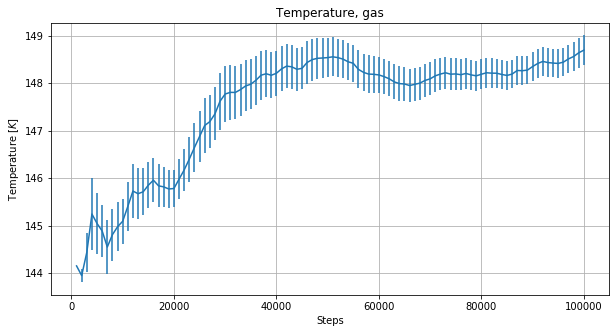

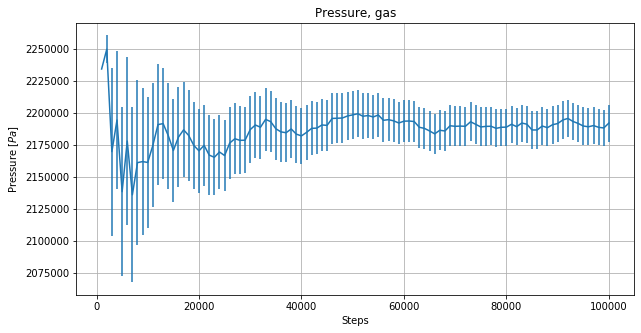

In [43]:
plt.figure(0,figsize=(10,5))
temp,err_temp=np.loadtxt("es4/Gas/output.temp.0", usecols=(2,3), unpack='true')
plt.errorbar(1000*x,T*temp,yerr=T*err_temp,label='T')
plt.title("Temperature, gas")
plt.xlabel('Steps')
plt.ylabel('Temperature $[K]$')
plt.grid(True)
plt.show()

plt.figure(0,figsize=(10,5))
pres,err_pres=np.loadtxt("es4/Gas/output.pres.0", usecols=(2,3), unpack='true')
plt.errorbar(1000*x,P*pres,yerr=P*err_pres,label='P')
plt.title("Pressure, gas")
plt.xlabel('Steps')
plt.ylabel('Pressure $[Pa]$')
plt.grid(True)
plt.show()